<a href="https://colab.research.google.com/github/SyedImranML/Machine-Learning/blob/main/Health_Insurance_Cost_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project 2 Health Insurance Cost Prediction Using ML**

In [27]:
# import the libraries

import pandas as pd
import numpy as np

In [28]:
data=pd.read_csv("insurance.csv")

Questions :

1. Display Top 5 Rows of The Dataset
2. Check Last 5 Rows of The Dataset
3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Check Null Values In The Dataset
6. Get Overall Statistics About The Dataset
Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values
8. Store Feature Matrix In X and Response(Target) In Vector y
9. Train/Test split
          1. Split data into two-part: a training set and a testing set
          2. Train the model(s) on the training set
          3. Test the Model(s) on the Testing set
10. Import the models
11. Model Training
12. Prediction on Test Data
13. Compare Performance Visually
14. Evaluating the Algorithm
16. Save Model Usign Joblib
17. GUI

In [29]:
# 1. Display Top 5 Rows of The Dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here age,sex,bmi,children,smoker,region are the features or independent variables.

charges -> dependent variable

In charges you can see continous in nature so this is regression problem
BMI -> body mask index

In [30]:
# 2. Check Last 5 Rows of The Dataset

data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [31]:
# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

data.shape

(1338, 7)

In [32]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


In [33]:
# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
# 5.Check Null Values In The Dataset

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
# 6. Get Overall Statistics About The Dataset

data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [35]:
# 7. Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values

data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [36]:
# 8. Store Feature Matrix In X and Response(Target) In Vector y

X = data.drop(['charges'],axis=1)
y = data['charges']

9. Train/Test split

1. Split data into two part : a training set and a testing set
2. Train the model(s) on training set
3. Test the Model(s) on Testing set

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
# 10. Import the models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
# 11. Model Training

lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [16]:
# 12. Prediction on Test Data

y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [17]:
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [18]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11863.872138,11001.128629
887,5272.17580,7116.295018,9492.515425,4986.196019,5840.174656
890,29330.98315,36909.013521,9648.758701,28213.261786,28001.980112
1293,9301.89355,9507.874691,9555.044136,9992.097520,9745.291602
259,33750.29180,27013.350008,9420.421978,34759.695295,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47235.623282,45431.423211
575,12222.89830,11814.555568,9625.431547,12100.308380,12465.025294
535,6067.12675,7638.107736,9504.168517,6401.273815,6974.336525
543,63770.42801,40959.081722,9605.004594,46674.384847,47862.047791


In [19]:
# 13. Compare Performance Visually

import matplotlib.pyplot as plt

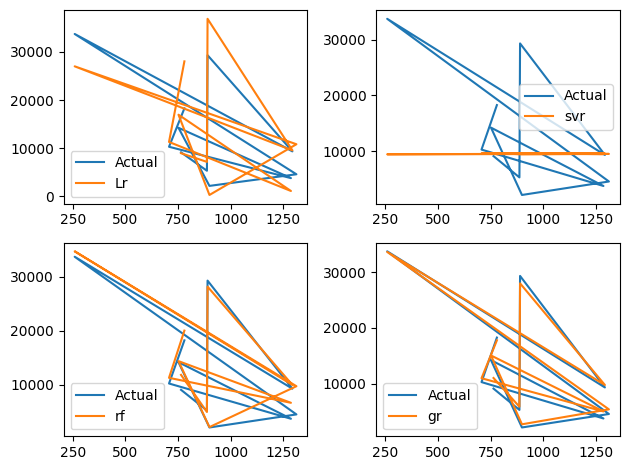

In [20]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [21]:
# 14. Evaluating the Algorithm

from sklearn import metrics

In [22]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [23]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8628807192678264 0.8779726251291786


In [24]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [25]:
print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2550.2201684275997 2447.9515580545844


In [45]:
# 15. Predict Charges For New Customer

data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [46]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [47]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42148.36188800322


In [29]:
# From above we found that gredianBoostingRegressor is the best model for this dataset. Before production,
# it is good practice to train our model on the entire dataset.

In [30]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [31]:
# Predict Charges For New Customer

new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42148.36188800322


In [ ]:
# 16. Save Model using Joblib


gr = GradientBoostingRegressor()
gr.fit(X,y)



In [41]:
import joblib

In [42]:
joblib.dump(gr,'model_joiblib_gr')

['model_joiblib_gr']

In [43]:
model = joblib.load('model_joiblib_gr')

In [48]:
model.predict(df)

array([42148.361888])

**GUI**

In [49]:
from tkinter import *

In [50]:
import joblib

In [58]:
import os


In [61]:


def show_entry():
  p1 = float(e1.get())
  p2 = float(e2.get())
  p3 = float(e3.get())
  p4 = float(e4.get())
  p5 = float(e5.get())
  p6 = float(e6.get())


  model = joblib.load('model_joiblib_gr')
  model.predict([[p1,p2,p3,p4,p5,p6]])
  Label(master,text = "Insurance Cost").grid(row=7)
  Label(master,text=result).grid(row=8)


if os.environ.get("DISPLAY"):
  # Create the main window
  master = Tk()

  # Your existing code here
  master.title("Insurance Cost Prediction")
  label = Label(master, text="Insurance Prediction", bg="black", fg="white")
  label.grid(row=0, columnspan=2)

Label(master,text = "Enter Your Age").grid(row=1)
Label(master,text = "Male or Female [1/0]").grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number of children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "Region [1-4]").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

botton(master,text="Predict",command=show_entry).grid()


mainloop()

NameError: name 'master' is not defined